# Forest Cover Type

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk

from pylab import *
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
hdata = fetch_covtype()
    
print(hdata['DESCR'])
    
x_data = hdata['data']
y_data = hdata['target']

Forest covertype dataset.

A classic dataset for classification benchmarks, featuring categorical and
real-valued features.

The dataset page is available from UCI Machine Learning Repository

    http://archive.ics.uci.edu/ml/datasets/Covertype

Courtesy of Jock A. Blackard and Colorado State University.



In [3]:
print('x_data shape: ',shape(x_data), '\ny_data shape: ', shape(y_data))
print(y_data)

x_data shape:  (581012, 54) 
y_data shape:  (581012,)
[5 5 2 ... 3 3 3]


### Plot the Univariate Feature and Target Distributions:

Text(0.5,1,'Target Distribution')

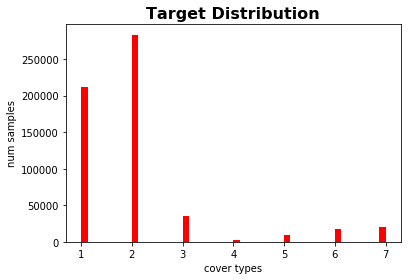

In [4]:
# Plot target Distribution
plt.hist(y_data,bins=48,color='r')
plt.xlabel('cover types')
plt.ylabel('num samples')
plt.title('Target Distribution', size = 16, weight = 'bold')

Text(0.5,1,'Feature Distributions')

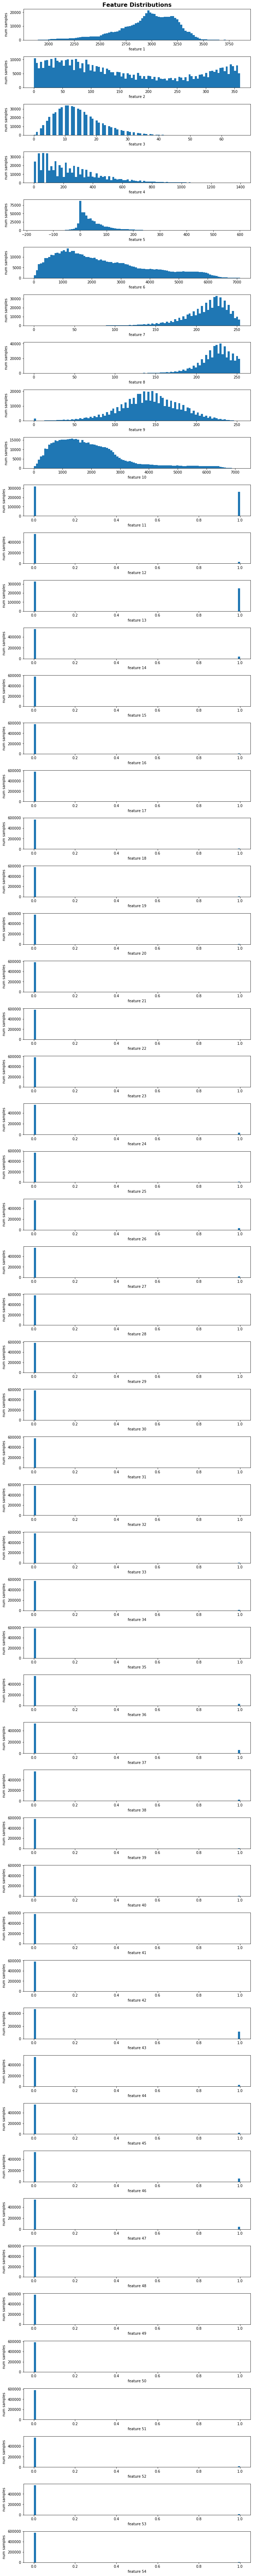

In [5]:
fig1, axes1 = plt.subplots(nrows=np.shape(x_data)[1], ncols=1)

for i, ax in enumerate(axes1):
    ax.hist(x_data[:,i], 100, range = (x_data[:,i].min(),x_data[:,i].max()))
    ax.set_xlabel('feature '+ str(i+1))
    ax.set_ylabel('num samples')
                         
fig1.set_figheight(100)
fig1.set_figwidth(10)
fig1.tight_layout()
axes1[0].set_title('Feature Distributions', size = 16, weight = 'bold')

### Plot the Target vs. Feature Distributions:

It is clear from the plots that the datasets contain many outliers, which may make our attempt to fit an accurate model more challenging.

Text(0.5,1,'Feature vs. Target Distributions')

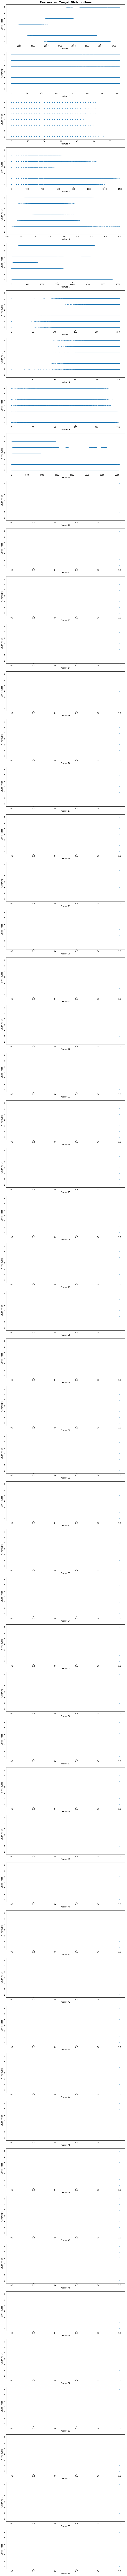

In [6]:
fig2, axes2 = plt.subplots(nrows=np.shape(x_data)[1], ncols=1)

for i, ax in enumerate(axes2):
    ax.scatter(x_data[:,i], y_data, s=1)
    ax.set_xlabel('feature '+ str(i+1))
    ax.set_ylabel('Cover Types')
    
    
fig2.set_figheight(200)
fig2.set_figwidth(10)
fig2.tight_layout()

axes2[0].set_title('Feature vs. Target Distributions', size = 16, weight = 'bold')

### Split the data. Reduce Size.

In [7]:
def split(x_data,y_data):
    x_training, x_test, y_training, y_test = train_test_split(x_data, y_data)
    #x_train, x_val, y_train, y_val = train_test_split(x_training, y_training, random_state=0)
    return x_training,y_training,x_test,y_test

#reduce size of data to pct %
pct = .01
z0,x_data_sm,z1,y_data_sm = train_test_split(x_data,y_data,test_size = pct, train_size=.01)

print('x shape = ', shape(x_data_sm), '\ny shape = ', shape(y_data_sm))

train_data = split(x_data_sm,y_data_sm)

#scale the feature data
scaler = StandardScaler()
scaled_train_data = split(scaler.fit_transform(x_data_sm),y_data_sm)


x shape =  (5811, 54) 
y shape =  (5811,)


### Apply Logistic Regression

Predictions using the scaled data were better than non-scaled data.

In [8]:
from sklearn import linear_model

def logistic_reg(data,tol):
    reg = linear_model.LogisticRegression(random_state=0, tol = tol, solver='saga', multi_class='multinomial').fit(data[0],data[1])
    reg_score = reg.score(data[2],data[3])
    return reg_score
tol = .03

print('logistic Regression Score = ',logistic_reg(train_data,tol))
print('\n','With scaled data =',logistic_reg(scaled_train_data,tol))

logistic Regression Score =  0.604267033723331

 With scaled data = 0.7130075705437027


### Apply Linear SVC

In [9]:
from sklearn.svm import LinearSVC

def svc_reg(data,tol):
    svc = LinearSVC(random_state=0, tol=tol, class_weight='balanced')
    svc.fit(data[0],data[1])
    svc_score = svc.score(data[2],data[3])
    return svc_score

tol = 0.03

print('Linear SVC Regression Score = ',svc_reg(train_data,tol))
print('\n','With scaled data =',svc_reg(scaled_train_data,tol))

Linear SVC Regression Score =  0.5230557467309016

 With scaled data = 0.673778389538885


### Apply Nearest Centroid model

In [10]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

def nearest_cent(data):
    nc = NearestCentroid()
    nc.fit(data[0],data[1])
    nc_score = nc.score(data[2],data[3])
    return nc_score

print('Nearest Centroid Score = ',nearest_cent(train_data))
print('\n','With scaled data =', nearest_cent(scaled_train_data))

Nearest Centroid Score =  0.2202339986235375

 With scaled data = 0.5581555402615279


## Now let's do grid search optimization of model parameters:

In [11]:
def gridscv(model,params,data,cv):
    gs = GridSearchCV(model,params,return_train_score=True,cv=cv)
    gs.fit(data[0],data[1])
    scores = gs.cv_results_['split0_train_score']
    plt.plot(params[list(params)[0]],scores)
    print('best parameters_unscaled: ', gs.best_params_)

    gs.fit(scaled_train_data[0],scaled_train_data[1])
    scores = gs.cv_results_['split0_train_score']
    plt.plot(params[list(params)[0]],scores)
    plt.legend(('unscaled','scaled'))
    
    print('best parameters_scaled: ', gs.best_params_)
    
    return gs.best_params_
    


### Logistic:

Tune paramater 'C', which is the inverse of regularization strength.

best parameters_unscaled:  {'C': 30.1}
best parameters_scaled:  {'C': 50.1}


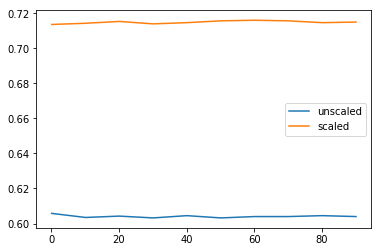

In [12]:
pmin = .1
pmax = 100
pstep = 10

tol = .03
cv = 3
logistic_params = {'C': np.arange(pmin,pmax,pstep)}
logistic = linear_model.LogisticRegression(tol=tol,  multi_class='multinomial', solver='saga')  

logistic_best_p = gridscv(logistic, logistic_params,[x_data_sm,y_data_sm],cv)


best parameters_unscaled:  {'C': 0.1}
best parameters_scaled:  {'C': 50.1}


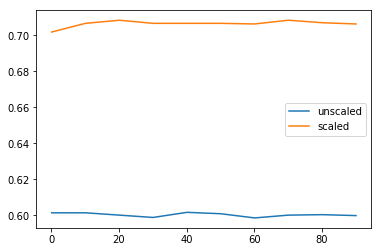

In [13]:
# Grid Search with cross validation shuffling.

cv_shuffle = KFold(n_splits=cv,shuffle=True) # Cross Validation generator with shuffling turned on.
logistic_best_p_shuffle = gridscv(logistic, logistic_params,[x_data_sm,y_data_sm],cv_shuffle)

### Linear SVC:

Tune paramater 'C', which is the penalty parameter C of the error term.

best parameters_unscaled:  {'C': 0.046415888336127774}
best parameters_scaled:  {'C': 0.21544346900318834}


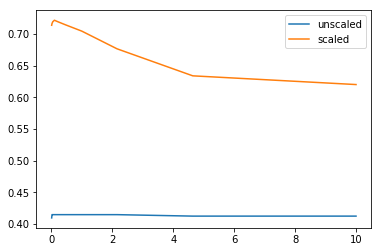

In [14]:
pmin = -2
pmax = 1
pstep = 10

svc_params = {'C': np.logspace(pmin,pmax,pstep)}
svc = LinearSVC(random_state=0, tol=tol, max_iter=100)  

svc_best_p = gridscv(svc, svc_params,[x_data_sm,y_data_sm],cv)


best parameters_unscaled:  {'C': 0.021544346900318832}
best parameters_scaled:  {'C': 0.21544346900318834}


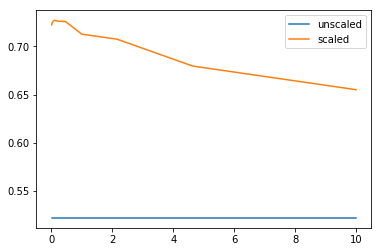

In [15]:
svc_best_p_shuffle = gridscv(svc, svc_params,[x_data_sm,y_data_sm],cv_shuffle)

### Nearest Centroid:

Tune parameter 'shrink_threshold'.

best parameters_unscaled:  {'shrink_threshold': 32.01}
best parameters_scaled:  {'shrink_threshold': 5.01}


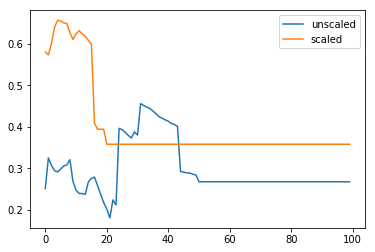

In [16]:
pmin = 0.01
pmax = 100
pstep = 1

a = np.arange(pmin,pmax,pstep)

nc_params = {'shrink_threshold': a}
nc = NearestCentroid()  

nc_best_p = gridscv(nc, nc_params,[x_data_sm,y_data_sm],cv)

best parameters_unscaled:  {'shrink_threshold': 31.01}
best parameters_scaled:  {'shrink_threshold': 5.01}


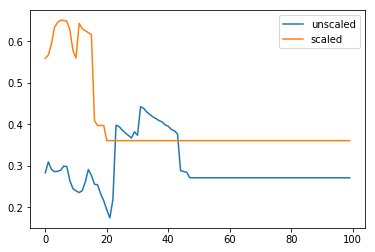

In [17]:
# Grid Search with cross validation shuffling.

nc_best_p_shuffle = gridscv(nc, nc_params, [x_data_sm,y_data_sm],cv_shuffle)

### Visualize the decision boundaries for each classifier. 

In [23]:
def make_meshgrid(x, y, h=.5):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def visualize_classification(feature1,feature2):

    X = train_data[0][:,feature1:feature2]
    y = train_data[1][:]

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    models = (LinearSVC(random_state=0, tol=tol, max_iter=100, C = svc_best_p['C']),
              linear_model.LogisticRegression(tol=tol,  multi_class='multinomial', solver='saga', C = logistic_best_p['C']),
              NearestCentroid(shrink_threshold = nc_best_p['shrink_threshold']))
    models = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = ('LinearSVC',
              'Logistic Regression',
              'NearestCentroid')

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Feature '+str(feature1))
        ax.set_ylabel('Feature '+str(feature2))
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    fig.set_figheight(20)
    fig.set_figwidth(20)

### Choose features to visualize.

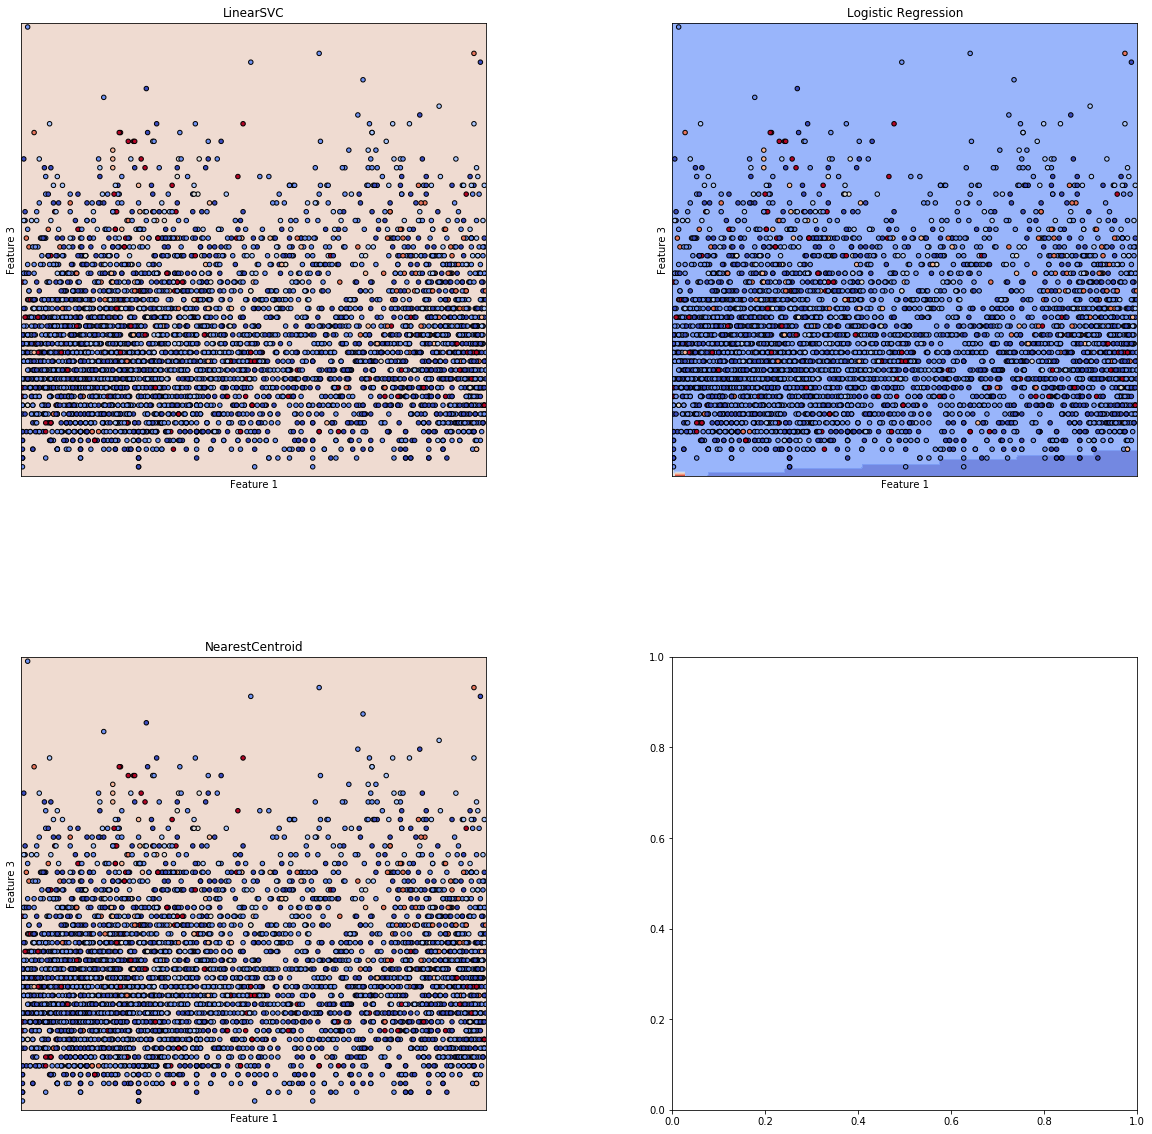

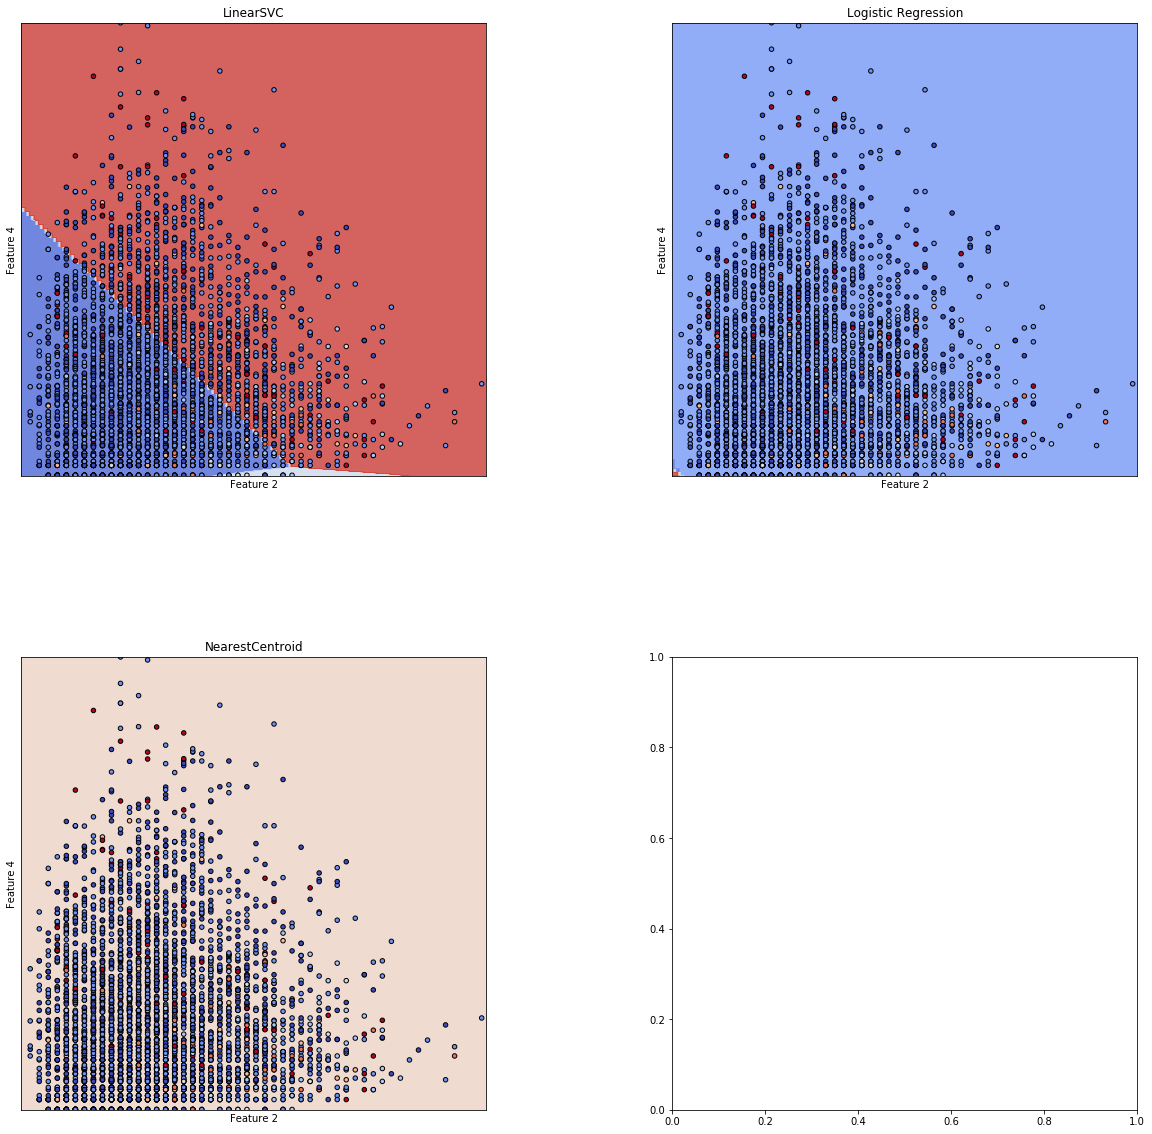

In [24]:
visualize_classification(1,3)
visualize_classification(2,4)

Didn't get to visualizing coefficients...